In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir("/content/drive/MyDrive/compressed_sensing")

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from utils_adversarial_ex import format_image_classif, unformat_image, adversarial_gradient_step


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1, 224, 224, 3)


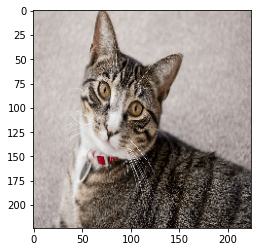

In [26]:
# on utilise le modele vgg16 entraine sur imagenet
model = tf.keras.applications.VGG16(include_top=True, weights='imagenet')

img, img_to_show = format_image_classif('petit_chat.jpg')
plt.imshow(img_to_show)
plt.show()
print(img.shape)

Vraie classe :  [('n02123045', 'tabby', 1.0)]
Debut de l'optimisation
[('n02123045', 'tabby', 0.55164677)]
[('n02123045', 'tabby', 0.5445536)]
[('n02123045', 'tabby', 0.52867997)]
[('n02123045', 'tabby', 0.4675158)]
[('n02124075', 'Egyptian_cat', 0.115600415)]
[('n04118538', 'rugby_ball', 0.98957753)]
[('n04118538', 'rugby_ball', 0.999936)]
[('n04118538', 'rugby_ball', 0.99998164)]
[('n04118538', 'rugby_ball', 0.9999894)]
[('n04118538', 'rugby_ball', 0.9999926)]
Fin de l'optimisation


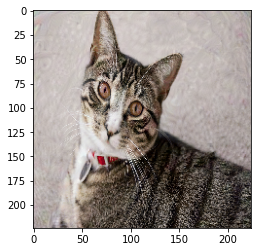

In [36]:
y_predicted = model.predict(img) 

# vraie classe
true_class = np.zeros((1, y_predicted.shape[1]))
true_class_ind = 281
true_class[0, true_class_ind] = 1 
print("Vraie classe : ",tf.keras.applications.vgg16.decode_predictions(true_class, top=1)[0])

# construction du model adv
img_backend = model.input
adversarial_model = tf.keras.Model(inputs=img_backend, outputs= model.get_layer('predictions').output )

img, img_to_show = format_image_classif('petit_chat.jpg')
img = tf.convert_to_tensor(img)

target_class = 768 # la classe qu'on souhaite faire predire par le model en le trompant

print("Debut de l'optimisation")
step = 0.2
n_iterations = 100
for iteration in range(0, n_iterations):
    img = adversarial_gradient_step(adversarial_model, img, step, target_class)
    if (iteration % 10 == 0):
        y_predicted = model.predict(img)
        print(tf.keras.applications.vgg16.decode_predictions(y_predicted, top=1)[0])
print("Fin de l'optimisation")

# affiche l'image mal classifiee
img_show = unformat_image(np.copy(img))
plt.imshow(img_show)
plt.show()